<a href="https://colab.research.google.com/github/doaa450/Hybrid-Model/blob/main/42_ETEL_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1 - Data Preprocessing

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!mkdir models
!rm -rf ./logs/

mkdir: cannot create directory ‘models’: File exists


In [ ]:
from google.colab import drive 
!gdown --id '1OMbPUQxu2kcxNXpP0ScSGFpvtosmiGdY'
# !unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1OMbPUQxu2kcxNXpP0ScSGFpvtosmiGdY
To: /content/TRAINY_OHLVC_ETEL.csv
100% 45.2k/45.2k [00:00<00:00, 75.7MB/s]


In [ ]:
# Import data
df_1 = pd.read_csv("/content/TRAINY_OHLVC_ETEL.csv")
print(df_1.head(2))
print('--------')
print(df_1.tail(2))

     datetime  Price  P_PRE_OHCL
0  2012-03-21  14.97   14.743577
1  2012-03-22  15.00   14.844813
--------
        datetime  Price  P_PRE_OHCL
1709  2019-03-24  14.46   14.258102
1710  2019-03-25  14.28   14.387283


In [ ]:
from google.colab import drive 
!gdown --id '1svnwdJ9LwDg01IjRXHxrVo3bHjwcdL9D'
# !unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1svnwdJ9LwDg01IjRXHxrVo3bHjwcdL9D
To: /content/TRAINY_Tech_ETEL.csv
100% 45.2k/45.2k [00:00<00:00, 16.5MB/s]


In [ ]:
# Import data
df_2 = pd.read_csv("/content/TRAINY_Tech_ETEL.csv")
print(df_2.head(2))
print('--------')
print(df_2.tail(2))

     datetime  Price   P_PRE_TI
0  2012-03-21  14.97  14.839377
1  2012-03-22  15.00  14.942579
--------
        datetime  Price   P_PRE_TI
1709  2019-03-24  14.46  14.359059
1710  2019-03-25  14.28  14.462309


In [ ]:
from google.colab import drive 
!gdown --id '15H_7OEXugFYygHdWMc99CrWBDW-DbGrY'
# !unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=15H_7OEXugFYygHdWMc99CrWBDW-DbGrY
To: /content/TESTY_OHLVC_ETEL.csv
100% 11.4k/11.4k [00:00<00:00, 17.7MB/s]


In [ ]:
# Import data
df_3 = pd.read_csv("/content/TESTY_OHLVC_ETEL.csv")
print(df_3.head(2))
print('--------')
print(df_3.tail(2))

     datetime  Price  P_PRE_OHCL
0  2019-03-27  14.48   14.396462
1  2019-03-28  14.54   14.370943
--------
       datetime  Price  P_PRE_OHCL
425  2020-12-29  11.49   11.502750
426  2020-12-30  11.80   11.525546


In [ ]:
from google.colab import drive 
!gdown --id '11qUiEsIKi4Sbv3RJnAPLArkjWVdi64TU'
# !unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=11qUiEsIKi4Sbv3RJnAPLArkjWVdi64TU
To: /content/TESTY_Tech_ETEL.csv
100% 11.4k/11.4k [00:00<00:00, 8.71MB/s]


In [ ]:
# Import data
df_4 = pd.read_csv("/content/TESTY_Tech_ETEL.csv")
print(df_4.head(2))
print('--------')
print(df_4.tail(2))

     datetime  Price  P_test_pre_TI
0  2019-03-27  14.48      14.474625
1  2019-03-28  14.54      14.473712
--------
       datetime  Price  P_test_pre_TI
425  2020-12-29  11.49      11.585763
426  2020-12-30  11.80      11.593550


In [ ]:
Train_stack=pd.DataFrame()

In [ ]:
Train_stack=df_1.iloc[:,:]
Train_stack.head(2)

,datetime,Price,P_PRE_OHCL
0,2012-03-21,14.97,14.743577
1,2012-03-22,15.00,14.844813


In [ ]:
Train_stack['y_TI']=df_2.iloc[:,2]

In [ ]:
Train_stack.head()

,datetime,Price,P_PRE_OHCL,y_TI
0,2012-03-21,14.97,14.743577,14.839377
1,2012-03-22,15.00,14.844813,14.942579
2,2012-03-25,14.61,14.865996,14.976054
3,2012-03-26,14.11,14.517688,14.652352
4,2012-03-27,14.04,14.010763,14.139339


In [ ]:
Train_stack.shape

(1711, 4)

In [ ]:
Train_stack.set_index('datetime',inplace=True)

In [ ]:
Train_stack.head()

,Price,P_PRE_OHCL,y_TI
datetime,,,
2012-03-21,14.97,14.743577,14.839377
2012-03-22,15.00,14.844813,14.942579
2012-03-25,14.61,14.865996,14.976054
2012-03-26,14.11,14.517688,14.652352
2012-03-27,14.04,14.010763,14.139339


In [ ]:
Train_stack.rename(columns = {'P_PRE_OHCL':'y_OHCL'}, inplace = True) 

In [ ]:
Train_stack.head(2)

,Price,y_OHCL,y_TI
datetime,,,
2012-03-21,14.97,14.743577,14.839377
2012-03-22,15.00,14.844813,14.942579


In [ ]:
Train_stack.tail(2)

,Price,y_OHCL,y_TI
datetime,,,
2019-03-24,14.46,14.258102,14.359059
2019-03-25,14.28,14.387283,14.462309


In [ ]:
TEST_stack=pd.DataFrame()

In [ ]:
TEST_stack=df_3.iloc[:,:]


In [ ]:
TEST_stack['y_TI']=df_4.iloc[:,2]

In [ ]:
TEST_stack.head(2)

,datetime,Price,P_PRE_OHCL,y_TI
0,2019-03-27,14.48,14.396462,14.474625
1,2019-03-28,14.54,14.370943,14.473712


In [ ]:
TEST_stack.set_index('datetime',inplace=True)

In [ ]:
TEST_stack.rename(columns = {'P_PRE_OHCL':'y_OHCL'}, inplace = True) 

In [ ]:
TEST_stack.shape

(427, 3)

In [ ]:
TEST_stack.head(2)

,Price,y_OHCL,y_TI
datetime,,,
2019-03-27,14.48,14.396462,14.474625
2019-03-28,14.54,14.370943,14.473712


In [ ]:
TEST_stack.tail(2)

,Price,y_OHCL,y_TI
datetime,,,
2020-12-29,11.49,11.502750,11.585763
2020-12-30,11.80,11.525546,11.593550


In [ ]:
Train_stack.shape

(1711, 3)

In [ ]:
TEST_stack.shape

(427, 3)

In [ ]:
Train_stack = Train_stack.values
Train_stack= Train_stack.astype("float32")


In [ ]:
TEST_stack = TEST_stack.values
TEST_stack= TEST_stack.astype("float32")


In [ ]:
X_train, y_train = Train_stack[:-1, :], Train_stack[1:,0]

In [ ]:
X_test, y_test = TEST_stack[:-1, :], TEST_stack[1:,0] 

In [ ]:
X_train[0]

array([14.97    , 14.743577, 14.839377], dtype=float32)

In [ ]:
y_train[0]

15.0

In [ ]:
X_test[0]

array([14.48    , 14.396462, 14.474625], dtype=float32)

In [ ]:
y_test[0]

14.54

In [ ]:


sc =  StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
from sklearn.linear_model import  Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)




Ridge(alpha=0.001)

In [ ]:
trainPredict=ridge.predict(X_train)

In [ ]:
testPredict=ridge.predict(X_test)

In [ ]:
#from sklearn.model_selection import TimeSeriesSplit

In [ ]:
#tscv = TimeSeriesSplit(n_splits=3)

## RMSE

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.22 RMSE
Test Score: 0.27 RMSE


## MAE

In [ ]:
MAE_test=np.mean(np.abs(testPredict-y_test))

In [ ]:
MAE_test

0.1778271

In [ ]:
MAE_train=np.mean(np.abs(trainPredict-y_train))

In [ ]:
MAE_train

0.15170513

## MAPE

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(y_test,testPredict)

1.490459218621254

In [ ]:
mape(y_train,trainPredict)

1.2949949130415916

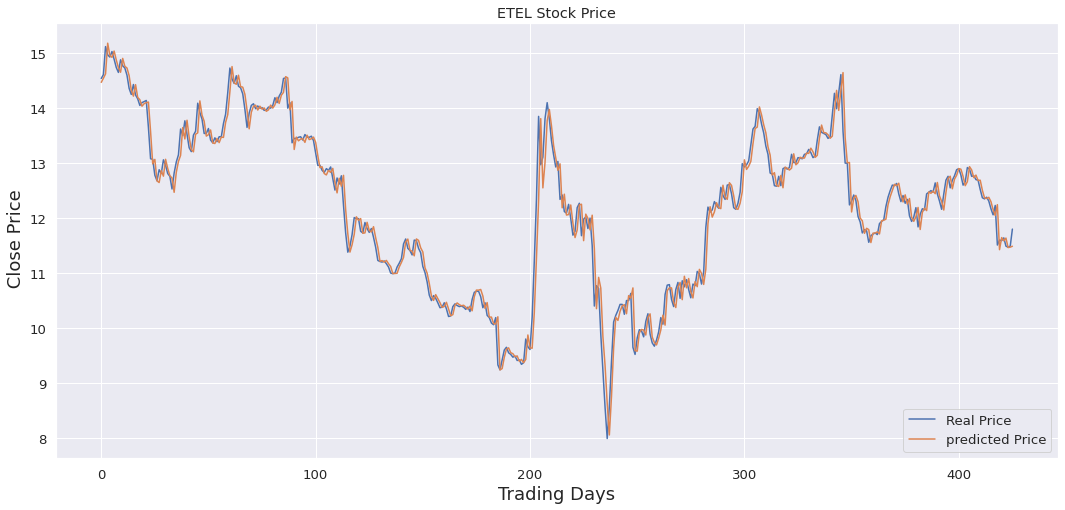

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test)
plt.plot(testPredict)
plt.title('ETEL Stock Price')
plt.legend(['Real Price','predicted Price'], loc='lower right')
plt.xlabel('Trading Days', fontsize=18)
plt.ylabel(' Close Price', fontsize=18)
plt.show()

In [ ]:
TESTY=pd.DataFrame(y_test)

In [ ]:
TESTY['P_test_pre_Stacking']=testPredict

In [ ]:
TESTY.head()

,0,P_test_pre_Stacking
0,14.54,14.469397
1,14.61,14.543960
2,15.12,14.623835
3,14.97,15.181923
4,14.93,14.959054


In [ ]:
TESTY.tail()

,0,P_test_pre_Stacking
421,11.64,11.587230
422,11.49,11.636477
423,11.47,11.463831
424,11.49,11.471895
425,11.80,11.487743


In [ ]:
ridge.get_params(deep=True)

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
ridge.intercept_

11.917491

In [ ]:
ridge.coef_

array([ 2.824368  , -0.8270981 ,  0.54377645], dtype=float32)

In [ ]:
ridge.intercept_

11.917491

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,testPredict)

0.9665291247506156